In [75]:
import sys
import cv2
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

sys.path.append("./../../modules/") # add path to scan customized module
import plt_show

"""
    ref: https://imgaug.readthedocs.io/en/latest/source/examples_basics.html
    
    'images' should be either a 4D numpy array of shape (N, height, width, channels)
    or a list of 3D numpy arrays, each having shape (height, width, channels).
    Grayscale images must have shape (height, width, 1) each.
    All images must have numpy's dtype uint8. Values are expected to be in
    range 0-255.

"""

seq1 = iaa.Sequential([
    iaa.Crop(px=(0, 200)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.Flipud(0.5), # vertically flip 50% of the images
    # iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
    iaa.Sometimes(0.5, iaa.Cartoon()),
])


seq2 = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.Affine(
        # scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        # translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )),
    iaa.CropToFixedSize(width=512, height=512),
    iaa.Fliplr(p=0.5),
    iaa.Flipud(p=0.5),
    iaa.Sequential([
        iaa.Sometimes(0.5, [
            iaa.WithChannels([0, 1], iaa.Clouds()), # ch_B, ch_G
            # iaa.Sometimes(0.3, iaa.Cartoon()),
            iaa.GammaContrast((0.5, 2.0)),
            iaa.OneOf([
                iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
                iaa.Sharpen(alpha=0.5)
            ])
        ]), 
    ], random_order=True),
    iaa.Dropout2d(p=0.2, nb_keep_channels=2),
])

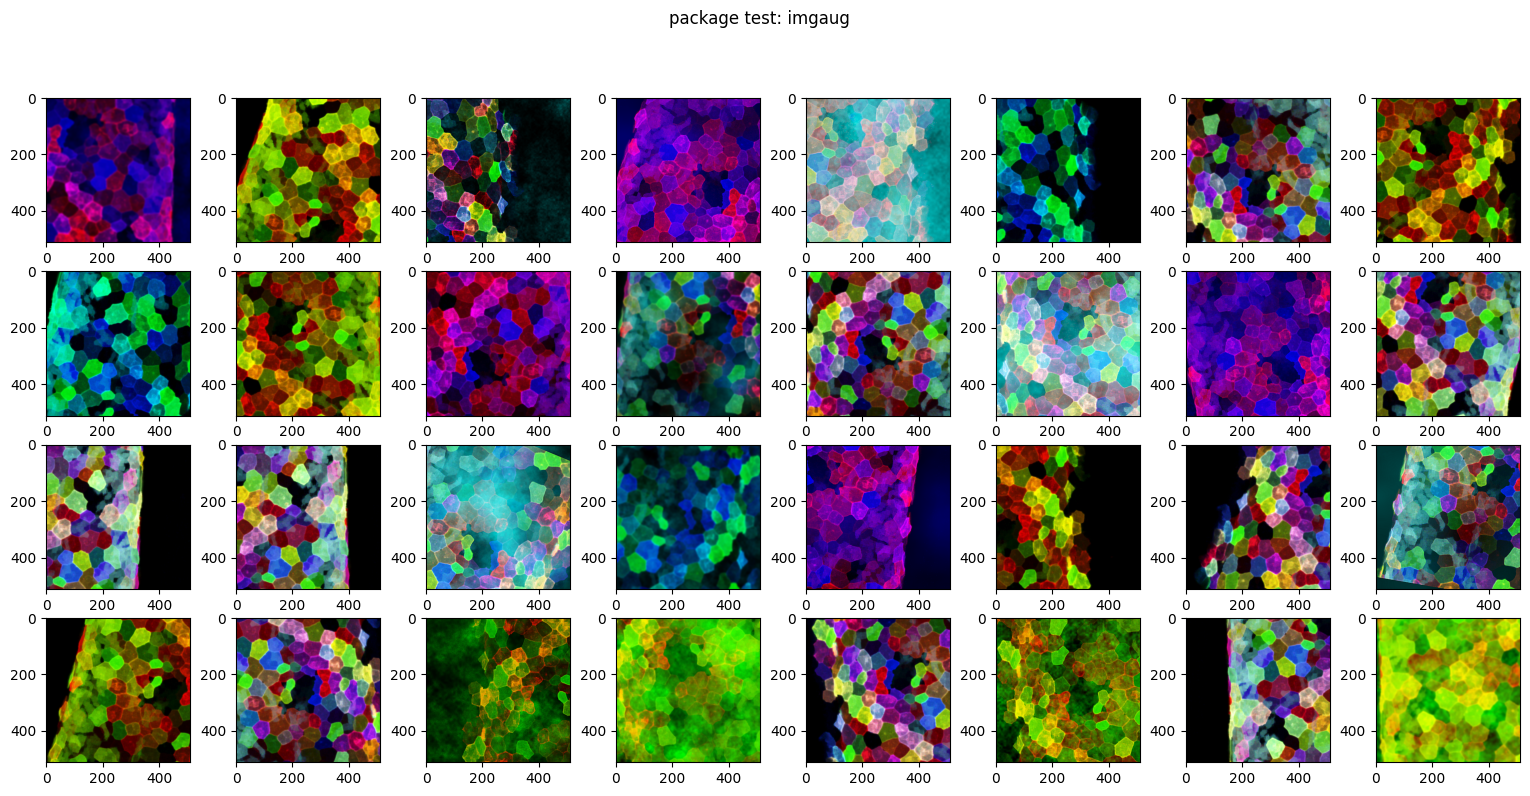

In [109]:
ia.seed(57) # To get consistent augmentations ( 'imgaug' package )

img_path = r"C:\Users\confocal_microscope\Desktop\{Temp}_Data\{20230305_NEW_STRUCT}_Academia_Sinica_i409\{ch4_min_proj, outer_rect}_PalmSkin_preprocess\20220610_CE001_palmskin_8dpf - Series001_fish_1_A_RGB\11_composite_RGB_HE_mix.tif"
image = cv2.imread(img_path)

layout = (4, 8)
batch_num = layout[0]*layout[1] # e.g. 15

size = [batch_num] # e.g. [15]
[size.append(i) for i in image.shape] # e.g. [15, 1024, 1024, 3]

images = np.ndarray(size, np.uint8) # e.g. (15, 1024, 1024, 3)
for i in range(batch_num): images[i, :, :, :] = image


# Do transform
images_aug = seq2(images=images) # 若 imgaug 有使用到 "CropToFixedSize"，會直接 return List 而不是 n_dim 的 ndarray
# images_aug_list = [ images_aug[i, :, :, :] for i in range(batch_num) ] # condition_1
images_aug_list = images_aug # condition_2

kwargs_plot_with_imglist = {
    "img_list": images_aug_list,
    "figtitle": "package test: imgaug",
    "fig_dpi": 200,
    "row": layout[0], 
    "column": layout[1],
    "save_path" : "aug_gallery.png"
}
plt_show.plot_with_imglist(**kwargs_plot_with_imglist)

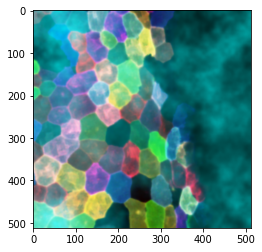

In [107]:
ia.seed(57) # To get consistent augmentations ( 'imgaug' package )

img_path = r"C:\Users\confocal_microscope\Desktop\{Temp}_Data\{20230305_NEW_STRUCT}_Academia_Sinica_i409\{ch4_min_proj, outer_rect}_PalmSkin_preprocess\20220610_CE001_palmskin_8dpf - Series001_fish_1_A_RGB\11_composite_RGB_HE_mix.tif"
image = cv2.imread(img_path)

# Do transform
image_aug = seq2(image=image)
image_aug = cv2.cvtColor(image_aug, cv2.COLOR_BGR2RGB)
plt.imshow(image_aug)